The data analysis of Heart Failure Clinic data. 
In the notebook the death events are the possibility of death of that patient with those specific data in diagnosis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
data = pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Getting the general information about the dataframe we will be using...

In [5]:
#For better representation
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
# data.info()
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

The relation between **age and demise possibility** can be now viewed. Here we can see the curve is bit inclined and somehow indicated that the death rate in middle age group was more as compared to other age groups.

<AxesSubplot:xlabel='age', ylabel='Density'>

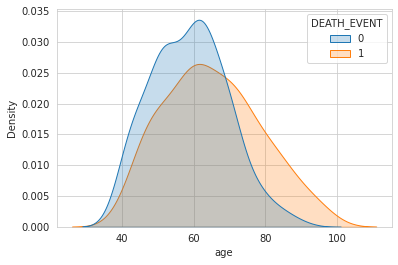

In [7]:
sns.kdeplot(data = data, x = "age", hue = "DEATH_EVENT",
            common_norm = False, shade = True)

So here the density map shows that the death rate was high in the **middle aged(60 years around)** patients with their data but the possibility of non death event was high than the death event.

But around the age of 70 to 100 years we can see the curve varied. Here the death event is more as we can visualise. In general we can say that the death is more possible with same
symptoms after 60 - 70 than the age below 60.

The density relation between **smoking and death event** is visualised...

<AxesSubplot:xlabel='smoking', ylabel='Density'>

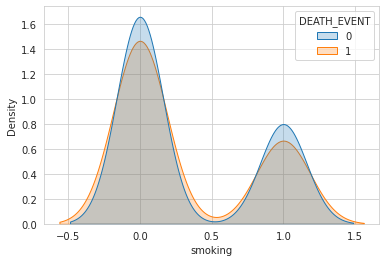

In [8]:
sns.kdeplot(data = data, x = 'smoking' , hue = "DEATH_EVENT", 
            common_norm = False, shade = True)

In the above visuals we can see that the curve are very well inclined. The curve is *high at two places* because the values provided were discreate and **binary(0 and 1)** with either **does'nt smoke or smokes**.
So, we can see that non death event is high in both the peaks. Also the peak at smokes condition is lower than the non smokers.
This indicates the distribution is similar in both the non-smokers and the smokers and its **not directly contributing in the predictions**.


Lets see other relations

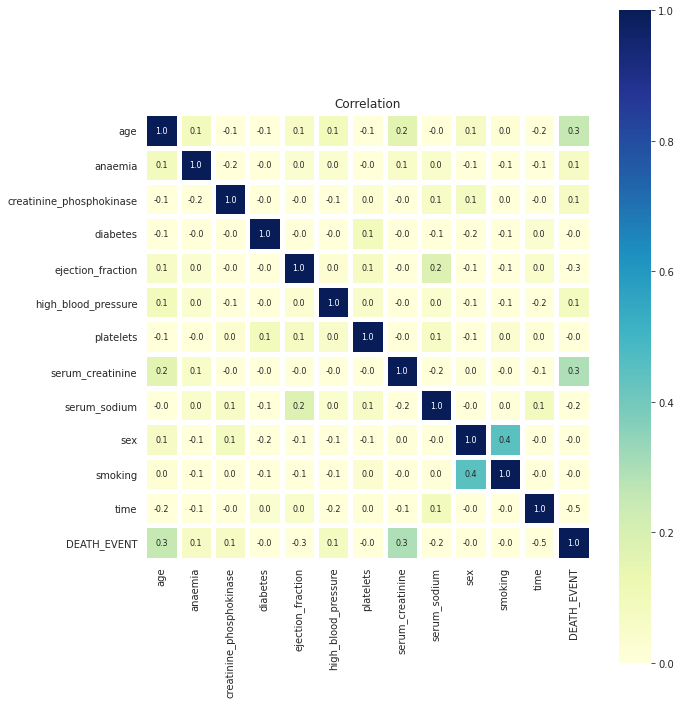

In [9]:
cor = data.corr()
plt.figure(figsize = (10,12))
sns.heatmap(cor,vmax = 1 ,vmin = 0,linewidth = 5, square =True, annot =True ,annot_kws ={'size':8},fmt ='.1f',cmap='YlGnBu')
plt.title('Correlation')
plt.show()

Here we can see that *death_event* has same and fair co-relation with **age and serum_creatinine**. So, lets see relation of serum_creatinine with death event ...
After that as anaemia and creatinine phosphokinase and high_blood_pressure is also around same co-relation with death_events, will check them too...

<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

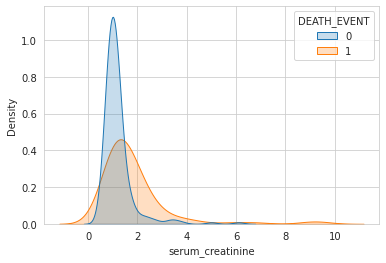

In [10]:
sns.kdeplot(data= data, x='serum_creatinine',hue ="DEATH_EVENT",common_norm = False, shade = True)

This shows a **huge difference** in death possibility with low serum creatinine but with very narrow edge. Thus if serum creatinine is **0 to 2** the possiblity of **non-death event is more than the death event**. Very specifically, the red curve(1) is **shifted to right** which indicate that the the **possibility of death is more as it reaches to creainine level 2**.
At *high* creatinine level the **death event is one** and as the number of cases are less thus the curve is minimal.

Now, checking anaemia...

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='anaemia'>

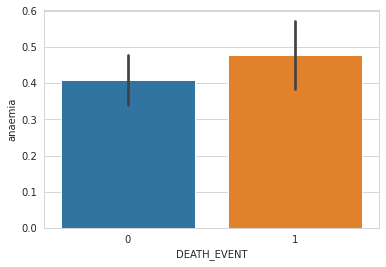

In [11]:
sns.barplot(data=data, x= "DEATH_EVENT" , y = "anaemia")

This shows that **more people with anaemia** had **possibility of death** as compared to those without anaemia.
Next lets see the relation of creatinine_phosphokinase...

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Density'>

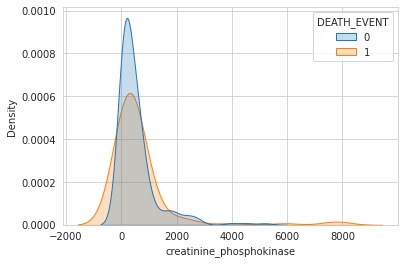

In [12]:
sns.kdeplot(data =data, x = "creatinine_phosphokinase" , hue = "DEATH_EVENT", common_norm = False , shade = True )

Here we can see that at **low level**(nearby zero) the **non death event is more than the death event**. The case becomes more with death events as the levels reaches to high. 
And lets see high blood pressure

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='high_blood_pressure'>

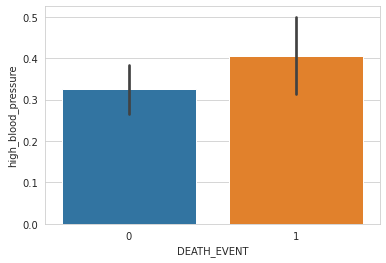

In [13]:
sns.barplot(data=data, x= "DEATH_EVENT", y = "high_blood_pressure")

This shows the death possibility is more when the blood pressure of the patients were high, thus indicating that they are related.

So, if conculsively **summarise the whole story** and analysis we come across that person's Age and Serum Creatinine levels were the major factors of death probability followed by enzyme creatinine phosphokinase and possibility of high blood pressure which is usually indication of some blockages, dense blood or colesterol levels. Anaemia was also a contributing factor but less than other factors.
Diabeties contributed least to the possibilities than any other comparing factor.

To be continued. Please Upvote, I am a beginner and here to learn and develop my skills.
Comment down to give your feedbacks. Feedbacks are precious to me.
